In [1]:
#import libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics
from tensorflow.keras import layers, callbacks
from tensorflow import keras

In [2]:
#read csv file
df = pd.read_csv('housing.csv')


In [3]:
#Check dataset
print("The Shape:",df.shape)
print("The NULL values:\n",df.isnull().sum())
print("Number of duplicated values",df.duplicated().sum())

The Shape: (20640, 10)
The NULL values:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Number of duplicated values 0


In [4]:
# drop null values
df.dropna(inplace=True)

In [5]:
# # drop outliers
# q_hi = df["median_house_value"].quantile(0.99)
# df = df[df["median_house_value"] < q_hi]

In [6]:
#descriptive statistics
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
#summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
# apply Label encoder
df_categorical = df.select_dtypes(include='object')
encoder = LabelEncoder()
df_categorical = df_categorical.apply(encoder.fit_transform)
df.drop(df_categorical.columns, axis=1, inplace=True)
df = pd.concat([df, df_categorical], axis=1)

In [9]:
# Define features and target variable
features = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
    'total_bedrooms', 'population', 'households', 'median_income'
]
target = 'median_house_value'

In [10]:
# Define features and target variable
X = df[features]
y = np.log1p(df[target])

In [11]:
# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# build network model
model = keras.Sequential([
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [14]:
# compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [ ]:
# apply early stopping 
early_stop = callbacks.EarlyStopping(
    patience=20,
    min_delta=0.0001,
    restore_best_weights=True,
)

In [16]:
# train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=300,
    callbacks=[early_stop],
)

Epoch 1/300
358/358 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 36.3569 - mae: 4.4398 - val_loss: 1.0560 - val_mae: 0.8907
Epoch 2/300
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7602 - mae: 1.0563 - val_loss: 0.2539 - val_mae: 0.3872
Epoch 3/300
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3944 - mae: 0.9362 - val_loss: 0.2324 - val_mae: 0.3776
Epoch 4/300
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3112 - mae: 0.9049 - val_loss: 0.2770 - val_mae: 0.3737
Epoch 5/300
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1174 - mae: 0.8401 - val_loss: 0.2367 - val_mae: 0.3833
Epoch 6/300
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0641 - mae: 0.8191 - val_loss: 0.2713 - val_mae: 0.4015
Epoch 7/300
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9760 - mae: 0.7896 - val_loss: 0.3511 - val_mae: 0.4617
Epoch 8/300
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9213 - mae: 0.7647 - val_loss: 0.3123 - val_mae: 0.4255
Epoch 9/300
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms

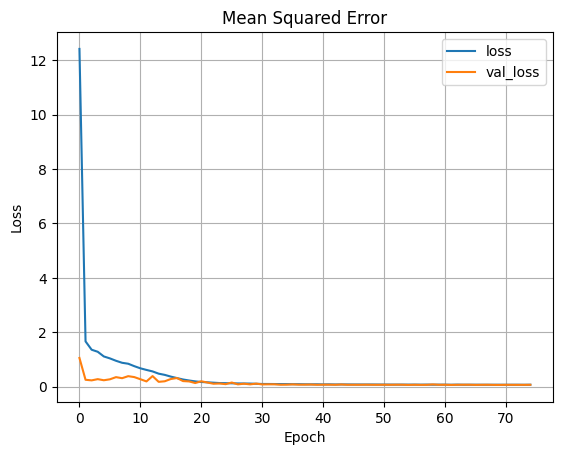

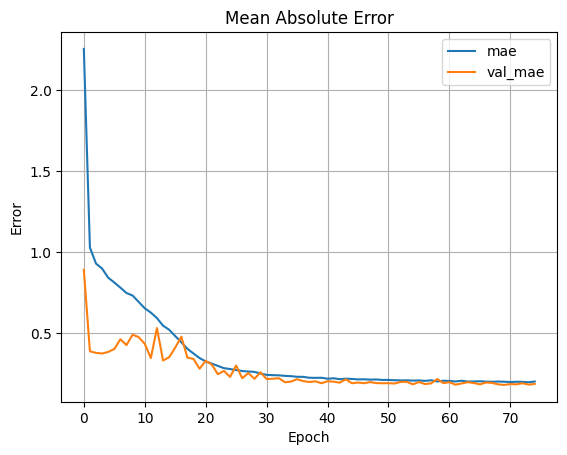

In [17]:
#compare the model loss against the actual val_loss
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(title="Mean Squared Error")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

#compare the model mae against the actual val mae
history_df[['mae', 'val_mae']].plot(title="Mean Absolute Error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.grid(True)
plt.show()

In [18]:
# Calculate performance metrics
y_pred = model.predict(X_test_scaled).flatten()
y_pred_actual = np.expm1(y_pred)
y_test_actual = np.expm1(y_test)

rmse = metrics.root_mean_squared_error(y_test_actual, y_pred_actual)
r2 = metrics.r2_score(y_test_actual, y_pred_actual)
mae = metrics.mean_absolute_error(y_test_actual, y_pred_actual)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
MAE: 36378.22
RMSE: 54785.77
R² Score: 0.7748


In [19]:
# Calculate performance metrics with Log
y_pred = model.predict(X_test_scaled)
rmse = metrics.root_mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
MAE: 0.18
RMSE: 0.26
R² Score: 0.7991


In [20]:
# test evaluate
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test RMSE: {np.sqrt(test_loss):.4f}")
print(f"Test MAE: {test_mae:.4f}")

192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0647 - mae: 0.1814  
Test RMSE: 0.2565
Test MAE: 0.1830
